In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
dataset_path = '"C:/Users/ADMIN/Desktop/MeghaUpreti_AGS(finalproject)/datasetGarbageSorting"'

In [3]:
# let's prepare the data and generate the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen_train = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2, 
                               brightness_range = (0.1, 0.5), horizontal_flip=True)

train_data = gen_train.flow_from_directory("C:/Users/ADMIN/Desktop/MeghaUpreti_AGS(finalproject)/datasetGarbageSorting",
                                           target_size = (224, 224), batch_size = 32, class_mode="categorical")

Found 396 images belonging to 9 classes.


In [4]:
# let's create a model
# here i'm going to use VGG16 model's parameter to solve this problem

from tensorflow.keras.applications.vgg16 import VGG16

# here i'm going to take input shape, weights and bias from imagenet and include top False means
# i want to add input, flatten and output layer by my self

vgg16 = VGG16(input_shape = (224, 224, 3), weights = "imagenet", include_top = False)

In [5]:
# now vgg16 weights are already train so i don't want to train that weights again
# so let's make trainable = False

for layer in vgg16.layers:
  layer.trainable = False

In [6]:
# let's add flatten layer or let's connect VGG16 with our own flatten layer

from tensorflow.keras import layers

x = layers.Flatten()(vgg16.output)

In [7]:
# now let's add output layers or prediction layer

prediction = layers.Dense(units = 9, activation="softmax")(x)

# creating a model object

model = tf.keras.models.Model(inputs = vgg16.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
# now let's compile the model

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

result = model.fit_generator(train_data, epochs = 200, steps_per_epoch=len(train_data))

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_11420/4286573657.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  result = model.fit_generator(train_data, epochs = 200, steps_per_epoch=len(train_data))


Epoch 1/200
13/13 [==============================] - 72s 5s/step - loss: 2.3627 - accuracy: 0.3763
Epoch 2/200
13/13 [==============================] - 82s 6s/step - loss: 1.5026 - accuracy: 0.5152
Epoch 3/200
13/13 [==============================] - 74s 5s/step - loss: 1.2239 - accuracy: 0.6162
Epoch 4/200
13/13 [==============================] - 78s 6s/step - loss: 1.1566 - accuracy: 0.5960
Epoch 5/200
13/13 [==============================] - 76s 6s/step - loss: 0.9300 - accuracy: 0.6641
Epoch 6/200
13/13 [==============================] - 75s 6s/step - loss: 0.9597 - accuracy: 0.6944
Epoch 7/200
13/13 [==============================] - 72s 5s/step - loss: 0.9574 - accuracy: 0.6768
Epoch 8/200
13/13 [==============================] - 74s 6s/step - loss: 0.9791 - accuracy: 0.6995
Epoch 9/200
13/13 [==============================] - 69s 5s/step - loss: 0.8269 - accuracy: 0.7449
Epoch 10/200
13/13 [==============================] - 70s 5s/step - loss: 0.8020 - accuracy: 0.7172
Epoch 11/

13/13 [==============================] - 66s 5s/step - loss: 0.3117 - accuracy: 0.9015
Epoch 84/200
13/13 [==============================] - 65s 5s/step - loss: 0.2395 - accuracy: 0.9369
Epoch 85/200
13/13 [==============================] - 66s 5s/step - loss: 0.1885 - accuracy: 0.9318
Epoch 86/200
13/13 [==============================] - 65s 5s/step - loss: 0.2387 - accuracy: 0.9242
Epoch 87/200
13/13 [==============================] - 65s 5s/step - loss: 0.1942 - accuracy: 0.9318
Epoch 88/200
13/13 [==============================] - 65s 5s/step - loss: 0.1855 - accuracy: 0.9444
Epoch 89/200
13/13 [==============================] - 67s 5s/step - loss: 0.1849 - accuracy: 0.9419
Epoch 90/200
13/13 [==============================] - 65s 5s/step - loss: 0.2288 - accuracy: 0.9141
Epoch 91/200
13/13 [==============================] - 65s 5s/step - loss: 0.1945 - accuracy: 0.9318
Epoch 92/200
13/13 [==============================] - 65s 5s/step - loss: 0.2450 - accuracy: 0.9268
Epoch 93/200


In [8]:
from tensorflow.keras.preprocessing import image
output_class = ["batteries", "clothes", "e-waste", "glass", "light blubs", "metal", "organic", "paper", "plastic"]
def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()
 
  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = model.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")

In [ ]:
#predciting the waste type
waste_prediction("bottle.jpg")

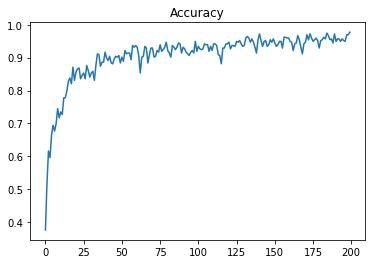

In [27]:
#ploting the accuracy graph
plt.title("Accuracy")
plt.plot(result.history["accuracy"])
plt.show()

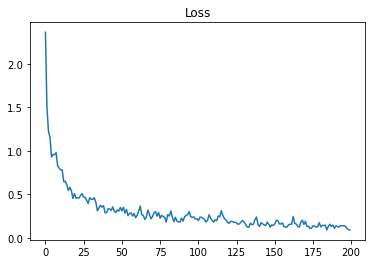

In [28]:
#plotting loss graph
plt.title("Loss")
plt.plot(result.history["loss"])
plt.show()

In [29]:
#saving the model and it is required further
model.save('Automated_Garbage_sorting_model.h5')

In [30]:
#CREATING A GUI FOR MY MODEL
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import tensorflow as tf
import numpy as np

class garbagesorting:
    def __init__(self, root):
        self.root = root
        self.root.title("Garbage sorting App")

        # Load your trained machine learning model
        self.model = tf.keras.models.load_model('C:/Users/ADMIN/Desktop/MeghaUpreti_AGS(finalproject)/Automated_Garbage_sorting_model.h5')

        # Create GUI components
        self.label = tk.Label(root, text="Garbage Sorting")
        self.label.pack()

        self.canvas = tk.Canvas(root, width=300, height=300)
        self.canvas.pack()

        self.browse_button = tk.Button(root, text="Browse Image", command=self.browse_image)
        self.browse_button.pack()

        self.classify_button = tk.Button(root, text="sort", command=self.sort_image)
        self.classify_button.pack()

        self.result_label = tk.Label(root, text="")
        self.result_label.pack()

        

    def browse_image(self):
        self.image_path = filedialog.askopenfilename(filetypes=[("Image files", "*.png;*.jpg;*.jpeg")])

        if self.image_path:
            # Display the selected image on the canvas
            image = Image.open(self.image_path)
            image = image.resize((300, 300), Image.ANTIALIAS)
            photo = ImageTk.PhotoImage(image)
            self.canvas.config(width=300, height=300)
            self.canvas.create_image(0, 0, anchor=tk.NW, image=photo)
            self.canvas.image = photo

    def sort_image(self):
        if self.image_path:
            # Preprocess the image
            input_image = self.preprocess_image(self.image_path)

            # Make a prediction using the model
            predictions = self.model.predict(input_image)

            # Get the class with the highest probability
            predicted_class_index = np.argmax(predictions)
            predicted_class = self.get_class_name(predicted_class_index)

            # Update the result label
            self.result_label.config(text=f"Prediction: {predicted_class}")
        else:
            self.result_label.config(text="Please select an image first.")

    def preprocess_image(self, image_path):
        # Load and preprocess the image for the model
        image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
        image_array = tf.keras.preprocessing.image.img_to_array(image)
        image_array = tf.expand_dims(image_array, 0)  # Add batch dimension
        input_image = tf.keras.applications.mobilenet_v2.preprocess_input(image_array)
        return input_image

    def get_class_name(self, class_index):
        # Replace this with your actual class names or labels
        class_names = ["plastic", "paper", "glass", "metal","light bulbs","organic","e-waste","clothes","batteries"]
        return class_names[class_index]

if __name__ == "__main__":
    root = tk.Tk()
    app = garbagesorting(root)
    root.mainloop()


1/1 [==============================] - 0s 222ms/step
